# Linear Regression using SKlearn

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
#from sklearn.ensemble import RandomForestRegressor

In [2]:
housing=pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing_features=housing.drop("MEDV",axis=1)
housing_labels= housing['MEDV'].copy()
housing_features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [6]:
housing_features=housing.drop("MEDV",axis=1)
housing_labels= housing['MEDV'].copy()
housing_features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [7]:
model=LinearRegression()
#model=RandomForestRegressor()

In [8]:
model.fit(housing_features,housing_labels)

LinearRegression()

In [9]:
some_data=housing_features.iloc[:5]
model.predict(some_data)

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

In [10]:
some_labels=housing_labels.iloc[:5]
some_labels

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

# Linear Regression from Scratch

In [11]:
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
from matplotlib import style
import random

In [12]:
style.use("fivethirtyeight")
#xs=np.array([1,2,3,4,5],dtype=np.float64)
#ys=np.array([4,4,6,3,8],dtype=np.float64)

In [13]:
def CreateDataset(rng,variance,step=2,correlation=False):
    val=1
    ys=[]
    for i in range(rng):
        y=val+random.randrange(-variance,variance)
        ys.append(y)
        if correlation:
            val+=step
        else:
            val-=step
    xs=[i for i in range(rng)]
    return np.array(xs,dtype=np.float64),np.array(ys,dtype=np.float64)

In [14]:
def BestFitSlopeAndIntercept(xs,ys):
    m=((mean(xs)*mean(ys))-mean(xs*ys))/((mean(xs)*mean(xs))-mean(xs*xs))
    b=mean(ys)-m*mean(xs)
    return m,b

In [15]:
def RootMeanSquaredError(y_orgi,y_line):
    return np.sqrt((sum((y_orgi-y_line)**2)/len(y_orgi)))

In [16]:
#def CofficientOfDetermination(y_orgi,y_line):
#    y_mean_line=[mean(y_orgi) for y in y_orgi]
#    squared_err_mean=SquaredError(y_orgi,y_mean_line)
#    squared_regr=SquaredError(y_orgi,y_line)
#    return 1-(squared_regr/squared_err_mean)

In [17]:
xs,ys=CreateDataset(40,40,2,correlation="True")
m,b=BestFitSlopeAndIntercept(xs,ys)
regression_line=[(m*x)+b for x in xs]

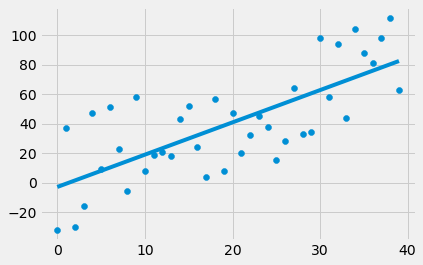

In [18]:
plt.scatter(xs,ys)
plt.plot(xs,regression_line)
plt.show()

In [19]:
rm_squared=RootMeanSquaredError(ys,regression_line)
print(rm_squared)

23.738830147128592


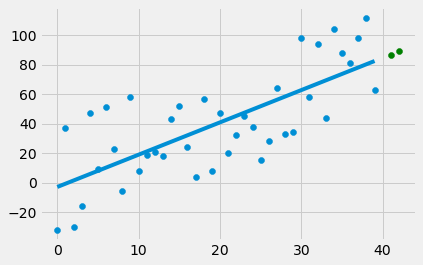

In [20]:
predict_x=[41,42]
predict_y=[(m*x)+b for x in predict_x]
plt.scatter(xs,ys)
plt.scatter(predict_x,predict_y,color="g")
plt.plot(xs,regression_line)
plt.show()

In [21]:
print(m,b)

2.1925891181988755 -2.9804878048780736
